# Jupyter notebook to test MLFF models 

In [10]:
import inference_functions as ifs
import importlib
import pandas as pd

In [23]:
importlib.reload(ifs)

<module 'inference_functions' from '/mnt/e/Documents/GitHub/MLFF_training/Inference/inference_functions.py'>

## Runs Inference for Mace and Chgnet

### Parse test set

In [3]:
filepath = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)


Processing:   0%|                                                                                             | 0/16 [00:00<?, ?it/s]

Error reading file: /home/nacho/NbOC/VASP/test_set/finished_calcs/
Error details: [Errno 2] No such file or directory: '/home/nacho/NbOC/VASP/test_set/finished_calcs/test/OUTCAR'


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  5.12it/s]


### Run inference using MLFF

In [5]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar')
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_0429 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar')
df_0529 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/relaxed_052924-290524.p/bestE_epoch26_e383_f495_s1317_mNA.pth.tar')
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_long68 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/long_68_aimd-120524/bestE_epoch20_e2_f52_s37_mNA.pth.tar')
df_long0526 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/data_052624_mixed-290524.p/bestE_epoch28_e56_f272_s755_mNA.pth.tar')
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar')
df_061024 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_data_060924-090624.p/bestE_epoch43_e82_f300_s1347_mNA.pth.tar')
df_binary = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar')
df_mace = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model',mace_flag=True)
df_mace_small = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/L0-small.model',mace_flag=True)
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True)
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar')
all_data_2 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar')
all_data_3 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar' )       

Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running MACE
Running MACE
Running MACE
Running CHgnet
Running CHgnet
Running CHgnet


## Example of a MLFF model Dataframe 

In [265]:
df_0407

,File,DFT E,Opt Δ (DFT),MLFF E,ΔE,Opt ΔE (MLFF),Opt ΔΔE,Forces MSE,natom,DFT Rank,MLFF Rank,Rank ρ
0,struct5_natom4,-31.273,5.842,-33.206,1.933,5.785,0.058,0.398,4,1.0,1.0,1.0
1,struct1_natom4,-30.973,6.272,-33.205,2.232,5.596,0.676,0.000,4,2.0,2.0,1.0
2,struct3_natom4,-27.417,9.787,-30.184,2.767,8.670,1.118,1.682,4,3.0,3.0,1.0
3,struct2_natom4,-27.297,9.957,-27.505,0.208,11.310,-1.353,0.000,4,4.0,4.0,1.0
4,struct4_natom4,-23.295,4.083,-25.699,2.405,4.951,-0.868,0.000,4,5.0,5.0,1.0
5,struct3_natom16,-111.467,7.783,-120.489,9.023,4.276,3.507,0.000,16,1.0,1.0,1.0
6,struct2_natom16,-109.918,40.168,-113.943,4.025,41.165,-0.997,0.096,16,2.0,2.0,1.0
7,struct5_natom16,-104.152,30.536,-109.977,5.825,31.529,-0.993,1.269,16,3.0,3.0,1.0
8,struct4_natom16,-102.680,47.857,-105.132,2.452,52.484,-4.627,0.428,16,4.0,4.0,1.0
9,struct1_natom16,-31.092,88.171,-55.535,24.443,73.677,14.494,15.250,16,5.0,5.0,1.0


## Graphs comparing inference on a test set

In [6]:
dataframes = [df_0407,df_0415,df_0429,df_0529,df_0415,df_long68,df_long0526,df_061024,df_mace,df_mace_small,df_clean_relaxed,all_data_1,all_data_2,all_data_3]
dataframe_names = ['April 4th', 'April 15th','April 29th', 'May 29th','AIMD','May 26 mixed','All AIMD','June 10th','First Mace model','Mace small','Clean relaxed MACE','All data 1','All data 2','All data 3']

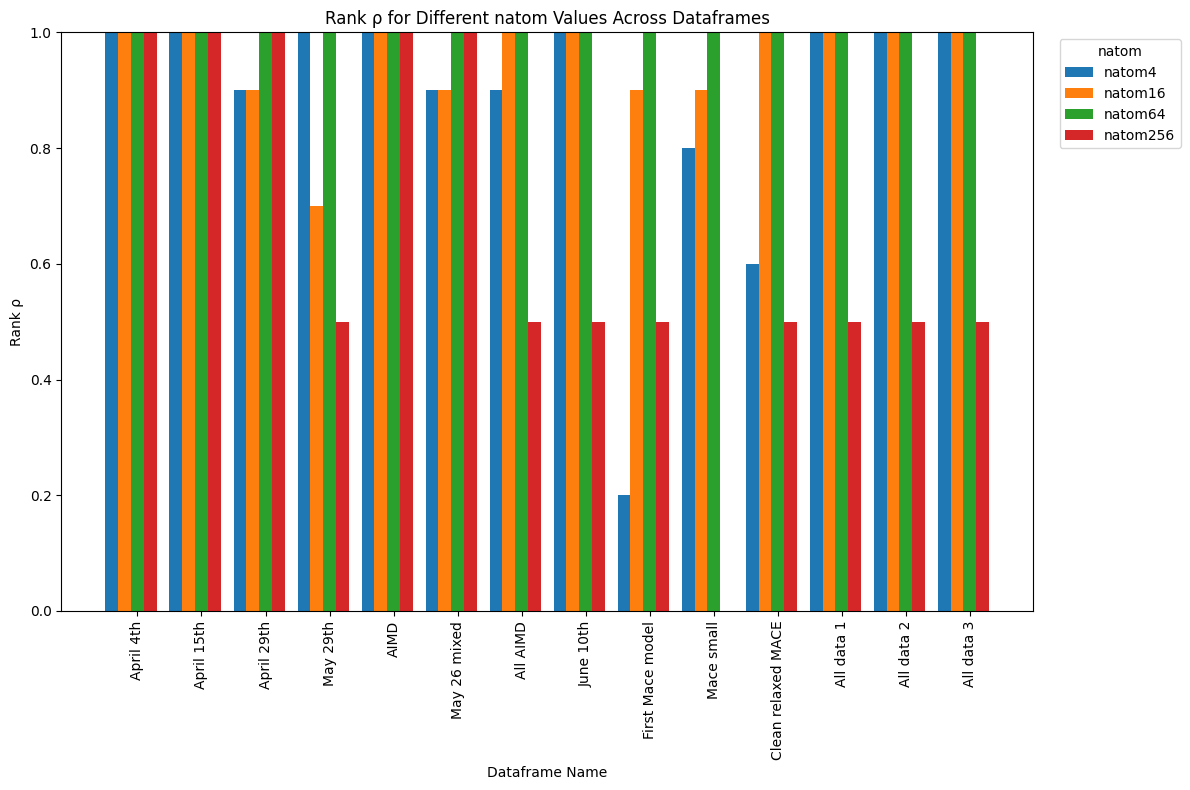

In [7]:
ifs.plot_rank_correlation(dataframes,dataframe_names)

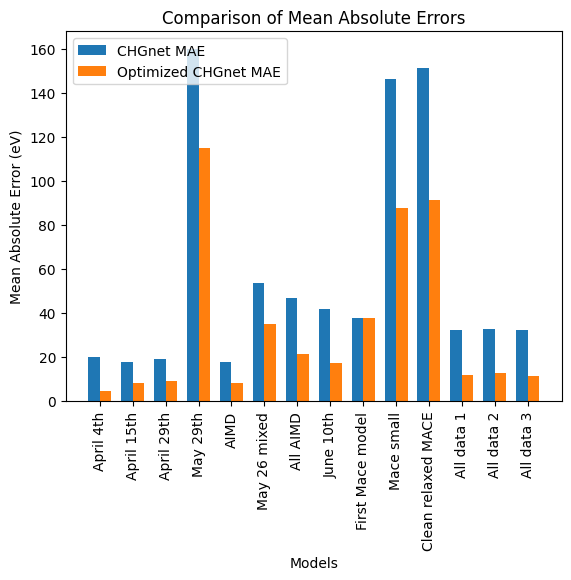

In [8]:
ifs.plot_mae_comparison(dataframes,dataframe_names)

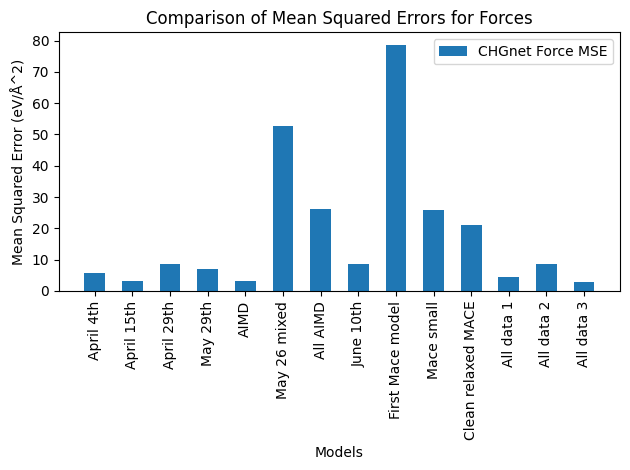

In [12]:
ifs.plot_mse_comparison(dataframes,dataframe_names)

## Running Geometry optimization with Chgnet

### June 21st model on natoms64 NbOC

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.728, DFT = 5.193, Difference (DFT - MLFF) = -0.535
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


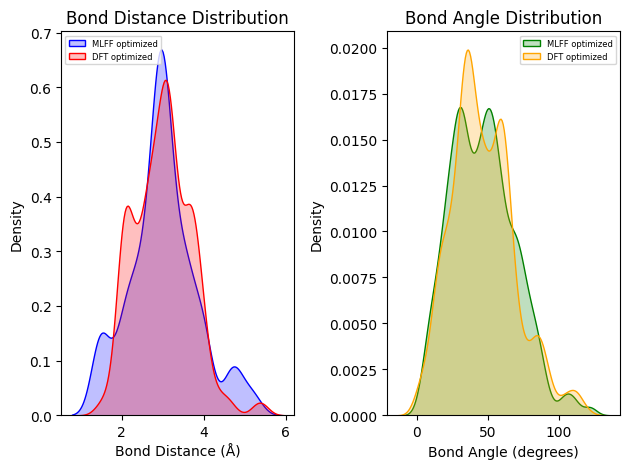

In [26]:
model_path = '/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [27]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th model on natoms64 NbOC 

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.728, DFT = 5.193, Difference (DFT - MLFF) = -0.535
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


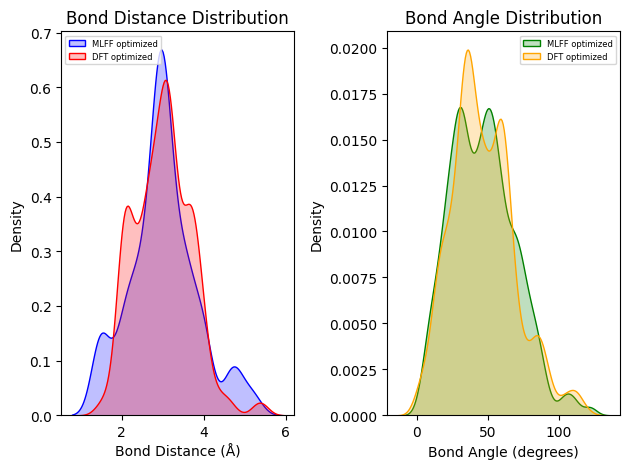

In [28]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [29]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th , binary AIMD data

In [30]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


In [31]:
ifs.visualize_trajectory(traj,struct,dft_energy)

spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 0 tolerance = 1.000000e-02 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 1 tolerance = 9.500000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 2 tolerance = 9.025000e-03 failed(line 800, /project/src/spacegroup.c).
spglib: No point group was found (line 405, /project/src/pointgroup.c).
spglib: Attempt 3 tolerance = 8.573750e-03 failed(line 800, /project/src/spacegroup.c).


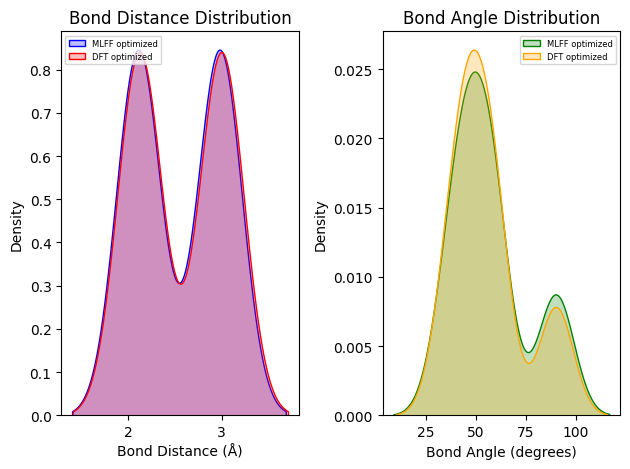

In [18]:
ifs.plot_bond_distributions(struct,last_struct)

In [19]:
ifs.optimization_summary(struct,last_struct)

MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


### June 10th binary, best forces model 

In [20]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestF_epoch26_e75_f275_s1335_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


### 04/29 Model 

In [21]:
model_path = '/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


In [22]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [23]:
ifs.optimization_summary(struct,last_struct)

MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


### Only binary oxides trained. 

In [24]:
model_path = '/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


MLFF vs DFT comparison:
Volume: MLFF = 74.624, DFT = 76.059, Difference (DFT - MLFF) = 1.435
Distance between atoms 0 and 1: MLFF = 2.977, DFT = 2.996, Difference (DFT - MLFF) = 0.019
Lattice parameters a: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters b: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027
Lattice parameters c: MLFF = 4.21, DFT = 4.237, Difference (DFT - MLFF) = 0.027


## MACE optimization 

In [27]:
model_path = '/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
opt_struct,dft_struct = ifs.mace_optimize(model_path,outcar_path,fmax=.001)

No dtype selected, switching to float64 to match model dtype.
      Step     Time          Energy          fmax
FIRE:    0 14:50:54     -283.556144       42.588061
FIRE:    1 14:50:54     -317.507985       37.793669
FIRE:    2 14:50:55     -346.137433       38.153367
FIRE:    3 14:50:56     -371.638286       35.367270
FIRE:    4 14:50:57     -393.560183       28.651781
FIRE:    5 14:50:57     -411.607810       21.231204
FIRE:    6 14:50:58     -426.198230       14.891762
FIRE:    7 14:50:59     -438.043211       10.132385
FIRE:    8 14:51:00     -447.818063        8.834043
FIRE:    9 14:51:01     -456.028790        7.605711
FIRE:   10 14:51:02     -463.009740        6.136845
FIRE:   11 14:51:02     -468.985486        5.091432
FIRE:   12 14:51:03     -474.146878        4.673523
FIRE:   13 14:51:04     -478.637059        4.433295
FIRE:   14 14:51:05     -482.498575        4.160673
FIRE:   15 14:51:06     -485.715560        3.879520
FIRE:   16 14:51:06     -488.294272        3.603225
FIRE

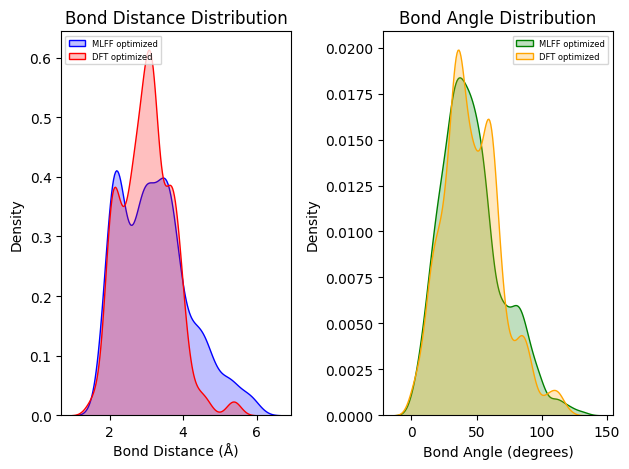

MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.103, DFT = 5.193, Difference (DFT - MLFF) = 0.09
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


In [37]:
ifs.plot_bond_distributions(opt_struct,dft_struct)
ifs.optimization_summary(opt_struct,dft_struct)

## Active Learning: Testing the variance of models.

In [81]:
import os 

model1 = dir + 'all_data_binary_061024-1706241.p/bestE_epoch26_e74_f281_s1351_mNA.pth.tar'
model2 = dir + 'all_data_binary_061024-1706242.p/bestE_epoch49_e75_f279_s1289_mNA.pth.tar'
model3 = dir + 'all_data_binary_061024-1706243.p/bestE_epoch36_e73_f275_s1306_mNA.pth.tar'

stds_old = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_old.append(std)
    print(file,std)

struct1_natom4 0.035624189828886654
test 0.05774290133073686
struct5_natom256 4.950916556405449
struct4_natom16 0.14836991194218901
struct5_natom4 0.08605469364074825
struct2_natom16 0.4089680167413792
struct2_natom64 0.9516208941347989
struct3_natom256 7.829275735939925
struct4_natom256 6.820223539582324
struct4_natom4 0.2731318791881324
struct1_natom16 2.2628945802491685
struct2_natom4 0.06725014725545105
struct3_natom16 0.45497664092648193
struct3_natom4 0.05198080682945725
struct3_natom64 1.464384931198902
struct5_natom16 0.5267866465157353


In [82]:
model1='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
model2='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar'
model3='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar'

stds_new = []
files = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_new.append(std)
    files.append(file)
    print(file,std)

struct1_natom4 0.023820291013181616
test 0.0890077543021298
struct5_natom256 6.60074501644197
struct4_natom16 0.2301247307217077
struct5_natom4 0.005042833884559453
struct2_natom16 0.042799214816923586
struct2_natom64 0.4529170556240026
struct3_natom256 4.950899064546356
struct4_natom256 1.1897078465637188
struct4_natom4 0.09941282645579524
struct1_natom16 1.6842737644972428
struct2_natom4 0.06539945475771967
struct3_natom16 0.12652557854729976
struct3_natom4 0.0420285159873422
struct3_natom64 0.6546948514701117
struct5_natom16 0.036062788304976306


In [80]:
len(stds_old)

16

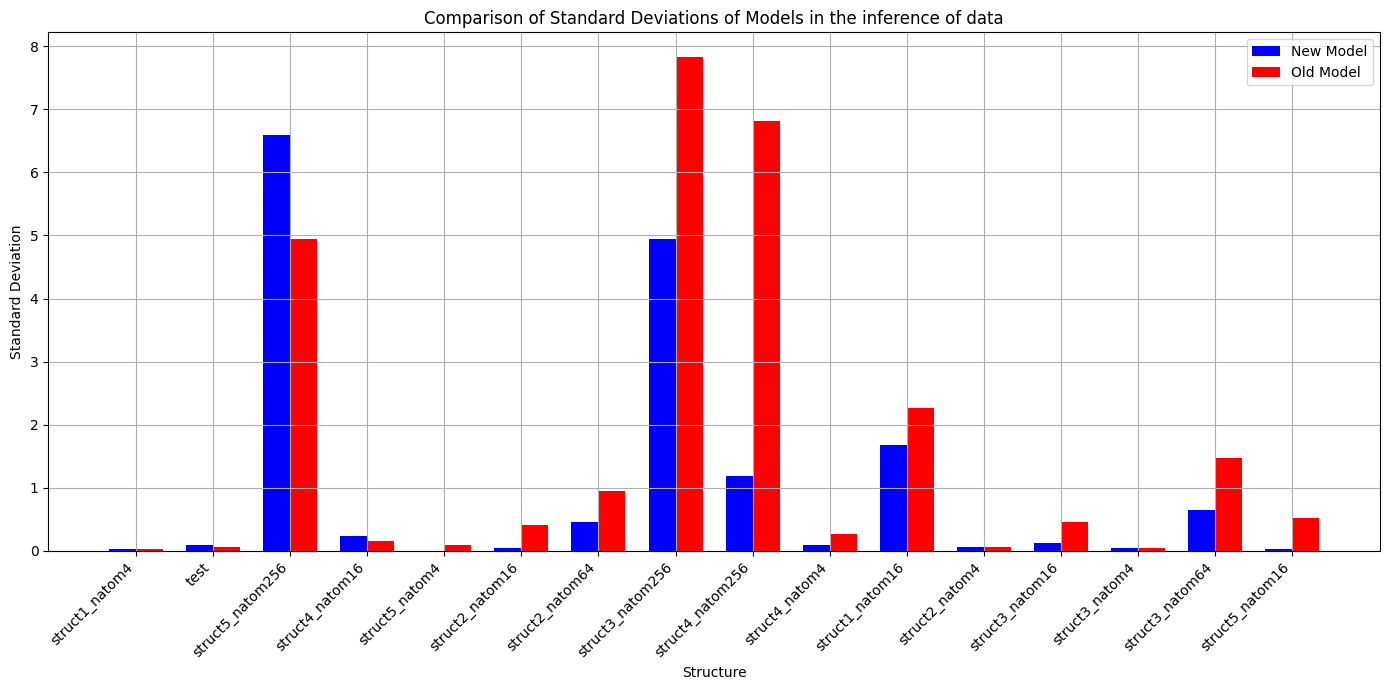

In [84]:
# X-axis labels
# X-axis labels


std_devs_1 = stds_new
std_devs_2 = stds_old

x_labels = ['struct1_natom4', 'test', 'struct5_natom256', 'struct4_natom16', 'struct5_natom4', 
            'struct2_natom16', 'struct2_natom64', 'struct3_natom256', 'struct4_natom256', 
            'struct4_natom4', 'struct1_natom16', 'struct2_natom4', 'struct3_natom16', 
            'struct3_natom4', 'struct3_natom64', 'struct5_natom16']

x_labels = files

# Indices for the x-axis
indices = np.arange(len(std_devs_1))

# Bar width
bar_width = 0.35

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(indices - bar_width/2, std_devs_1, bar_width, label='New Model', color='b')
plt.bar(indices + bar_width/2, std_devs_2, bar_width, label='Old Model', color='r')

# Adding titles and labels
plt.title('Comparison of Standard Deviations of Models in the inference of data')
plt.xlabel('Structure')
plt.ylabel('Standard Deviation')
plt.xticks(indices, x_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()